In [54]:
#SENTIMENT ANALYSIS FOR HOTEL REVIEWS
#importing few libararies
#It is used for the categories unset to ignore all warnings

import warnings
warnings.filterwarnings("ignore")


In [21]:
#Imported the data from the Kaggle based on hotel reviews and converted into a csv file using pandas.
import pandas as pd
Reviewdata = pd.read_csv('Hotel_Review.csv',encoding = "ISO-8859-1")
Reviewdata.shape

(38932, 5)

In [59]:
# Made the Is_Response our target column.
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 4 columns):
Description                38932 non-null object
Is_Response                38932 non-null object
cleaned_description        38932 non-null object
cleaned_description_new    38932 non-null object
dtypes: object(4)
memory usage: 1.2+ MB


In [10]:
#And here, we are summarizing and interpreting the information 
#and characteristics of our data set.

Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,35826.0,37.285008,6.996544,-25.43675,33.82734,37.936026,41.672491,63.877674
longitude,35826.0,-85.725758,33.062263,-166.55904,-104.86820,-86.822972,-77.044550,115.164407
reviews.doRecommend,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.rating,35050.0,3.776431,1.416195,0.00000,3.00000,4.000000,5.000000,10.000000


In [25]:
#Now the important step is Cleaning the data, check the missing values and
#print the percentage of it .Here we did not find missing values and if it is found 
#out treat it positively.


count=Reviewdata.isnull().sum().sort_values(ascending=False)
percentage=((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage],axis=1,keys=['Count','Percentage'])
print('Count and percentage of missing values for the columns')
missing_data

Count and percentage of missing values for the columns


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


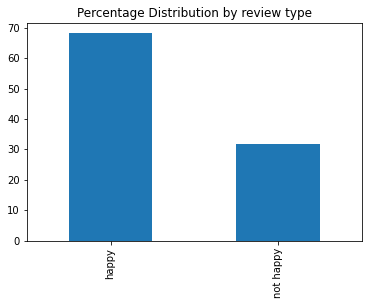

In [28]:
#here we had find out the percentage of happy and not happy as per our target column
#plotted the bar graph to know the distribution.

import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by review type')
plt.show()

In [29]:
#Remove the unnecessary columns if needed.
Reviewdata.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)

In [30]:
#cleaning for the first time.
#we also need to remove the characters, punctuations and all the additional things.
import re
import string
def text_clean_first(text):
    text= text.lower()
    text = re.sub('\[.*?\]','',text)
    text= re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text= re.sub('\w*\d\w*','',text)
    return text
cleanedFirst = lambda x: text_clean_first(x)


In [31]:
#Here we are generating the new column in the data cleaned_description
#that will be much cleaner than the raw set.

Reviewdata['cleaned_description']= pd.DataFrame(Reviewdata.Description.apply(cleanedFirst))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [36]:
#Cleaning for the second time
#For removing quotes, newline and more commas

def text_clean_second(text):
    text = re.sub('[''"",,,]','', text)
    text = re.sub('\n','',text)
    return text
cleanedSecond = lambda x: text_clean_second(x)

In [37]:
#Again adding another new column for more cleaner version of the data set.

Reviewdata['cleaned_description_new']= pd.DataFrame(Reviewdata['cleaned_description'].apply(cleanedSecond))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [39]:
#MODELLING THE DATA
#PREPARE TRAIN DATA AND TEST DATA FOR MODELLING IN ASPECT WITH ITS LENGTH.

from sklearn.model_selection import train_test_split
Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test,DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state= 225)

print('IV_train:',len(IV_train))
print('IV_test:',len(IV_test))
print('DV_train:',len(DV_train))
print('IV_test:',len(IV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
IV_test: 3894


In [41]:
#ANOTHER IMPORTANT STEP IS FIGURING OUT TF-IDF.
#It is  is a numerical statistic that is intended to reflect
#how important a word is to a document in a collection or corpus.
#And lbfgs approximates the second derivative matrix updates with gradient evaluations

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#TDIDFVECTORIZER transforms text to feature vectors that can be used as input to estimator. It converts 
#each token (word) to feature index in the matrix, each unique token gets a feature index.
tvec = TfidfVectorizer()

#And Logistic Regression is the used algorithm for our model. 
#Instead we can also use Naive bayes and SVM

clf2= LogisticRegression(solver = 'lbfgs')
from sklearn.pipeline import Pipeline


In [42]:
#Pipeline allows to transform data from one representation
#to another through a series of steps.
#And it is used here to create a vectorizer then fit the model with classifier.

model = Pipeline([('vectorizer',tvec), ('classifier', clf2)])
model.fit(IV_train, DV_train)

#Here we are using confusion matrix algorithm.
#confusion matrix is a table that is often used to describe the
#performance of a classification model on a set of test data.It is much simpler too. 


from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)


array([[2418,  304],
       [ 153, 1019]], dtype=int64)

In [43]:
#Now we get the Accuracy, precision score and recall score after modelling our data.
#And the accuracy is quite good.

from sklearn.metrics import accuracy_score, precision_score, recall_score
print ("Accuracy:",  accuracy_score(predictions, DV_test))
print ("Precision:",  precision_score(predictions, DV_test, average ='weighted'))
print ("Accuracy:",  recall_score(predictions, DV_test, average ='weighted'))



Accuracy: 0.8826399589111453
Precision: 0.8892426562188848
Accuracy: 0.8826399589111453


In [52]:
#TRYING NEW EXAMPLES TO GET THE POSITIVE AND NEGATIVE REVIEWS, SOMETIMES IT MAY NOT GIVE
#THE ACCURATE ANSWER BUT IN MAXIMUM TIMES THE RESULT COMES AS REQUIRED.


example =[" I am really satisfied"]
result = model.predict(example)
print(result)

['happy']
